<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module3/hw8_dec_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [ ]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
df = df[['pclass', 'age', 'embarked', 'fare']]
df.head()

,pclass,age,embarked,fare
0,3,22.0,S,7.2500
1,1,38.0,C,71.2833
2,3,26.0,S,7.9250
3,1,35.0,S,53.1000
4,3,35.0,S,8.0500


# Завдання 1
Очистіть дані від викидів(лише `fare`), розділіть на тренувальну та тестову чатини

In [ ]:
df.shape

(891, 4)

In [ ]:
column = df['fare']
q1 = column.quantile(q=0.25)
q3 = column.quantile(q=0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
mask = (column >= lower) & (column <= upper)
df = df[mask]

In [ ]:
df.shape

(775, 4)

In [ ]:
y = df['fare']
X = df.drop(columns='fare')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)

# Завдання 2
Створіть Pipeline для обробки даних

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_columns = X.select_dtypes(include='number').columns
cat_columns = X.select_dtypes(include='object').columns

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

# Завдання 3
Створіть остаточну модель та натренуйте її

In [ ]:
from sklearn import tree
model = Pipeline(
    [("prep", preprocessor),
     ("model", tree.DecisionTreeRegressor(max_depth=4,
                                          random_state=42))])

In [ ]:
preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['pclass', 'age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['embarked'], dtype='object'))])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['pclass', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['embarked'], dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=4, random_state=42))])

# Завдання 4
Виведіть основні метрики моделі

<Axes: >

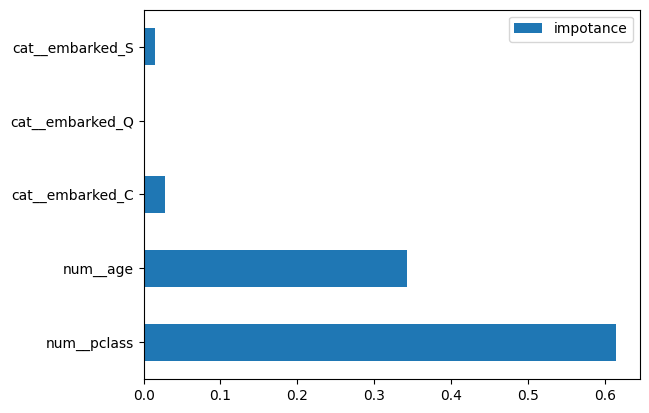

In [ ]:
impotance = pd.DataFrame({'impotance': model['model'].feature_importances_},
                         index=model['model'].feature_names_in_)

impotance.plot(kind='barh')

In [ ]:
from sklearn import metrics

def get_metrics(y_true, y_pred):
    metrics_dict = {}

    metrics_dict["MAE"] = metrics.mean_absolute_error(y_true, y_pred)
    metrics_dict["RMSE"] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
    metrics_dict["R2"] = metrics.r2_score(y_true, y_pred)

    return metrics_dict

In [ ]:

def calculate_metrics(model, X_train, y_train, X_test, y_test, name="model"):
  curr_metrics = pd.DataFrame()

  train_metrics = get_metrics(y_train, model.predict(X_train))
  test_metrics = get_metrics(y_test, model.predict(X_test))
  for metric_name, metric_value in train_metrics.items():
        curr_metrics.loc[name, f"train_{metric_name}"] = metric_value

  for metric_name, metric_value in test_metrics.items():
      curr_metrics.loc[name, f"test_{metric_name}"] = metric_value

  return curr_metrics



In [ ]:
all_metrics = pd.DataFrame()

In [ ]:
all_metrics = pd.concat([all_metrics, calculate_metrics(model, X_train, y_train, X_test, y_test, name="without_outl")])

# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

Попробуйте:
* не видаляти викиди
* змінити обробку даних(imputer та кодування категоріальних даних)
* змінити параметри дерева(глибина, кількість точок у листках тощо

In [ ]:
all_metrics = pd.concat([all_metrics, calculate_metrics(model, X_train, y_train, X_test, y_test, name="with_outl")])

In [ ]:
all_metrics = pd.concat([all_metrics, calculate_metrics(model, X_train, y_train, X_test, y_test, name="max_depth_7")])

In [ ]:
all_metrics = pd.concat([all_metrics, calculate_metrics(model, X_train, y_train, X_test, y_test, name="friedman_mse")])

In [ ]:
all_metrics = pd.concat([all_metrics, calculate_metrics(model, X_train, y_train, X_test, y_test, name="poisson")])

In [ ]:
all_metrics = pd.concat([all_metrics, calculate_metrics(model, X_train, y_train, X_test, y_test, name="min_sam_leaf_20")])

In [ ]:
all_metrics

,train_MAE,train_RMSE,train_R2,test_MAE,test_RMSE,test_R2
without_outl,5.830969,8.718372,0.388810,7.736565,11.065573,0.382279
with_outl,11.611916,21.348289,0.670824,18.330538,43.673825,0.302311
max_depth_7,4.619321,7.881613,0.500500,7.932831,11.734417,0.305347
friedman_mse,3.683582,7.301799,0.571288,8.131909,12.142786,0.256157
poisson,3.767453,7.339034,0.566905,8.162430,12.046241,0.267938
min_sam_leaf_20,6.800463,9.827556,0.223401,8.680884,12.335453,0.232365


# Завдання 6
Збережіть модель

In [ ]:
import joblib
joblib.dump(model, 'model_max_d_4')

['model_max_d_4']